In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [14]:
def compute_mean_std(x, y_data):
    """
    Plots the average over all ys as bold line and standart deviation as shaded area
    Each entry in y_array list will become one line
    :param x: common x ticks
    :param y_data: data to take mean and std of
    """
    mean = np.mean(y_data, axis=0)
    std = np.std(y_data, axis=0)

    return mean, std


In [15]:
def gather_data(path, x, idx):
    """
    Gather data, to the corresponding x-data until idx
    """
    y_data_returns = np.zeros((len(path), x.shape[0]))
    y_data_succ = np.zeros((len(path), x.shape[0]))

    for i in range(len(path)):
        data = np.load(path[i], mmap_mode='r')

        # take mean over 10 eval episodes of one run
        returns = data["results"][idx]
        success_rate = returns.copy()
        success_rate[np.where(returns > 0)] = 1
        success_rate[np.where(returns < 0)] = -1

        mean_return = np.sum(returns, axis=1) / data["results"].shape[1] # average over number of eval episodes
        success_rate = np.sum(success_rate, axis=1) / data["results"].shape[1] # average over number of eval episodes

        # gather values of different runs
        y_data_returns[i] = mean_return
        y_data_succ[i] = success_rate

    return y_data_returns, y_data_succ


In [20]:
path_stable = ["SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval01_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
              "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval02_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
              "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval03_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
              "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval04_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
              "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval05_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
              "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval06_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval07_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval08_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval09_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz",
               "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/StableBaselines3/skill_conditioned_2x2_eval10_num_skills8_neg_distFalse_movementFalse_reward_on_changeTrue_sparseTrue/evaluations.npz"]

path_tandon = ["SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval01_2000.npz",
            "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval02_2000.npz",
            "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval03_2000.npz",
            "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval04_2000.npz",
            "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval05_2000.npz",
            "SAC/checkpoints/2x2_puzzle/Comparison_Tandon/Tandon/eval06_2000.npz"]

In [21]:
data_stable = np.load(path_stable[1], mmap_mode='r')
for k in data_stable.files:
    print(k, data_stable[k])
    
data_tandon = np.load(path_tandon[0], mmap_mode='r')
for k in data_tandon.files:
    print(k, data_tandon[k])

timesteps [  1000   2000   3000   4000   5000   6000   7000   8000   9000  10000
  11000  12000  13000  14000  15000  16000  17000  18000  19000  20000
  21000  22000  23000  24000  25000  26000  27000  28000  29000  30000
  31000  32000  33000  34000  35000  36000  37000  38000  39000  40000
  41000  42000  43000  44000  45000  46000  47000  48000  49000  50000
  51000  52000  53000  54000  55000  56000  57000  58000  59000  60000
  61000  62000  63000  64000  65000  66000  67000  68000  69000  70000
  71000  72000  73000  74000  75000  76000  77000  78000  79000  80000
  81000  82000  83000  84000  85000  86000  87000  88000  89000  90000
  91000  92000  93000  94000  95000  96000  97000  98000  99000 100000
 101000 102000 103000 104000 105000 106000 107000 108000 109000 110000
 111000 112000 113000 114000 115000 116000 117000 118000 119000 120000
 121000 122000 123000 124000 125000 126000 127000 128000 129000 130000
 131000 132000 133000 134000 135000 136000 137000 138000 139000 140

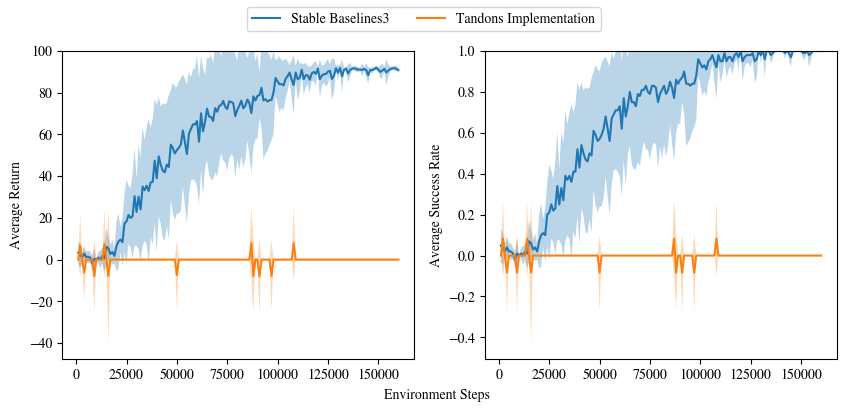

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

x = np.load(path_stable[0], mmap_mode='r')["timesteps"]
idx = np.where(x <= 160000)
x = x[idx]

returns_stable, succ_stable = gather_data(path_stable, x, idx)
returns_tandon, succ_tandon = gather_data(path_tandon, x, idx)

mean_return_stable, std_return_stable = compute_mean_std(x, returns_stable)
mean_succ_stable, std_succ_stable = compute_mean_std(x, succ_stable)

mean_return_tandon, std_return_tandon = compute_mean_std(x, returns_tandon)
mean_succ_tandon, std_succ_tandon = compute_mean_std(x, succ_tandon)

ax[0].plot(x, mean_return_stable, label="Stable Baselines3")
ax[0].fill_between(x, mean_return_stable + std_return_stable, mean_return_stable - std_return_stable, alpha=0.3)
ax[0].plot(x, mean_return_tandon, label="Tandons Implementation")
ax[0].fill_between(x, mean_return_tandon + std_return_tandon, mean_return_tandon - std_return_tandon, alpha=0.3)
ax[0].set_ylim(top=100)
ax[0].set_ylabel("Average Return")

ax[1].plot(x, mean_succ_stable, label="Stable Baselines3")
ax[1].fill_between(x, mean_succ_stable + std_succ_stable, mean_succ_stable - std_succ_stable, alpha=0.3)
ax[1].plot(x, mean_succ_tandon, label="Tandons Implementation")
ax[1].fill_between(x, mean_succ_tandon + std_succ_tandon, mean_succ_tandon - std_succ_tandon, alpha=0.3)
ax[1].set_ylim(top=1.)
ax[1].set_ylabel("Average Success Rate")



fig.text(0.5, 0.01, 'Environment Steps', ha='center')
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='upper center')

plt.show()

Every 1000 environment steps, we evaluated for 10 episodes and averaged the returns and success rate over them. We did 10 runs like this. In bold, we can see the mean of those runs. The shaded areas visualize the standard deviation. During training, we terminated an episode on change of symbolic state. However, during evaluation we did not do so but ended every episode after 100 steps. This way we can see via the return how long the actor took to reach the goal state in an episode.

In [38]:
for key, value in data_stable.items():
    np.savetxt("eval_data_stable" + key + ".csv", value)

In [39]:
for key, value in data_pran.items():
    np.savetxt("eval_data_pran" + key + ".csv", value)

NameError: name 'data_pran' is not defined

In [40]:
data.close()

NameError: name 'data' is not defined

In [41]:
simple_path = ["fm_eval_empty_input_4skills.npz", "fm_eval_empty_input_24skills.npz"]
symstate_path = ["fm_eval_sym_input_4skills.npz", "fm_eval_sym_input_24skills.npz"]

In [42]:
data_simple_4skills = np.load(simple_path[0], mmap_mode='r')
data_simple_24skills = np.load(simple_path[1], mmap_mode='r')
for k in data_simple_4skills.files:
    print(k, data_simple_4skills[k])
    
data_sym_4skills = np.load(symstate_path[0], mmap_mode='r')
data_sym_24skills = np.load(symstate_path[1], mmap_mode='r')
for k in data_sym_4skills.files:
    print(k, data_sym_4skills[k])

train_loss [2.20244288 2.20266342 1.80845916 1.59634161 1.1578989  1.12246752
 1.26721716 1.34514606 0.9825564  0.90007782 0.70583755 0.71205121
 0.71032542 1.055601   1.25717711 0.48000455 0.78105295 0.6042462
 0.88999718 0.72660589 0.63663894 0.59663045 0.67618883 0.88616896
 0.89498413 0.8865844  0.48721883 0.68001086 0.7300812  0.83930218
 0.64586431 0.49886441 0.70941937 0.58239418 0.49981147 0.54867405
 0.99231249 0.75245881 0.62048948 0.66447306 0.69265801 0.66338229
 0.65441865 0.74946886 0.50798732 0.68605208 0.61076015 0.59296793
 0.70459777 0.58879906 0.60266447 0.57810813 0.51356888 0.70125836
 0.65704501 0.47922635 0.7221294  0.68024117 0.57893884 0.56752628
 0.55905777 0.63791198 0.6782636  0.84219152 0.53561521 0.53802854
 0.50579584 0.57078278 0.75681889 0.49403921 0.61732763 0.53723818
 0.5010612  0.62642241 0.59970611 0.66696781 0.56722218 0.49511015
 0.49806121 0.58123499 0.6354484  0.46044981 0.75710392 0.49864733
 0.65306854 0.57264632 0.58947033 0.66248143 0.52836

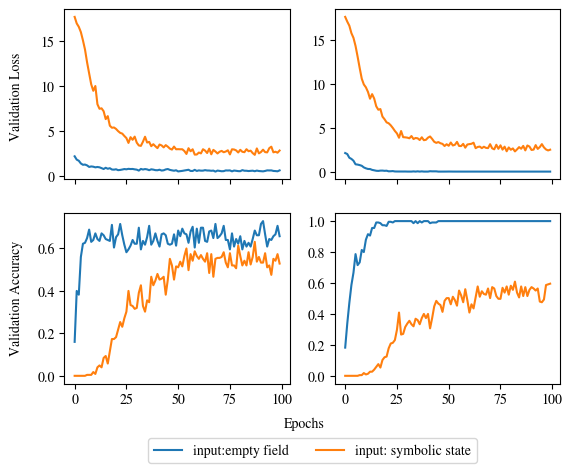

In [47]:
fig, ax = plt.subplots(2,2, sharex=True)

ax[0, 0].plot(np.arange(data_simple_4skills["test_loss"].shape[0]), data_simple_4skills["test_loss"], label="input:empty field")
ax[0, 0].plot(np.arange(data_simple_4skills["test_loss"].shape[0]), data_sym_4skills["test_loss"], label="input: symbolic state")
ax[1, 0].plot(np.arange(data_simple_4skills["test_acc"].shape[0]), data_simple_4skills["test_acc"], label="input:empty field")
ax[1, 0].plot(np.arange(data_simple_4skills["test_acc"].shape[0]), data_sym_4skills["test_acc"], label="input: symbolic state")

ax[0, 1].plot(np.arange(data_simple_24skills["test_loss"].shape[0]), data_simple_24skills["test_loss"], label="input:empty field")
ax[0, 1].plot(np.arange(data_simple_24skills["test_loss"].shape[0]), data_sym_24skills["test_loss"], label="input: symbolic state")
ax[1, 1].plot(np.arange(data_simple_24skills["test_acc"].shape[0]), data_simple_24skills["test_acc"], label="input:empty field")
ax[1, 1].plot(np.arange(data_simple_24skills["test_acc"].shape[0]), data_sym_24skills["test_acc"], label="input: symbolic state")

fig.text(0.5, 0.01, 'Epochs', ha='center')
fig.text(0.04, 0.28, 'Validation Accuracy', va='center', rotation='vertical')
fig.text(0.04, 0.7, 'Validation Loss', va='center', rotation='vertical')

fig.subplots_adjust(bottom=0.1)
handles, labels = ax[1, 1].get_legend_handles_labels()
fig.legend(labels=labels, bbox_to_anchor=(0.78,0.), ncol=2)
plt.show()
